# ImageDataGenerator
- 학습시 모델에 Image dataset을 제공하는 파이프라인 Generator
    - Image 데이터들을 Network(모델)에 **배치단위**로 제공한다.
    - 다양한 <u>Image Augmentation(이미지증식) 기능을 제공</u>한다. 
        - Data제공 파이프라인에 Image Augmentation을 쉽게 적용할 수 있다.
- 전체 데이터를 한번 다 제공하더라도 계속 요청하면 반복해서 제공한다.
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

## ImageDataGenerator()
- `tensorflow.keras.preprocessing.image.ImageDataGenerator`
    - Image 제공 데이터파이프라인을 어떻게 만들지 설정한다.
    
- **매개변수**: 이미지 증식(augmentation) 관련 설정을 정의
    - **fill_mode**: 이동이나 회전시 생기는 공간을 어떻게 채울 것인지 설정
        - nearest: 빈공간에 가장 가까운 pixel로 채우기 (1,2,3 [3],[3],[3])
        - reflect: 빈공간 근처 공간의 값을 거울로 반사되는 값들으로 채움. (1,2,3 [3],[2],[1])
        - constant: 지정한 값으로 채움. 기본은 0이고 특정값으로 채울때는 cval=100 으로 설정
    - **Nomalization 설정**
        - **rescale**: 지정한 값을 각 픽셀에 곱한다. (rescale=1/255.)
        - **featurewise_center=True**: channel의 평균을 pixel에서 빼서 평균 0으로 표준화한다. (channel 별로 처리)
        - **featurewise_std_nomalization=True**: channel 별로 표준화한다. (평균 0, 표준편차 1)
    - **반전**
         - **horizontal_flip=True**: 좌우반전, **vertical_flip=True**: 상하 반전
    - **회전(rotation)**
         - **rotation_range**=정수:  -정수 ~ +정수 범위로 **랜덤** 회전 (rotation_rate=30 : -30 ~ +30도 사이에서 랜덤하게 회전)
    - **이동**
         - **width_shift_range=실수**: 상하 이동, **height_shift_range=실수**: 좌우 이동
         - 실수값: 이동범위지정.  0 ~ 1 이면 이미지 너비, 높이 기준 비율. 1이상이면 pixel. 
         - 정수: [-정수, 0, +정수]  범위
         
    - **Zoom**
         - **zoom_range**: 실수 또는 [lower, upper]
             - 실수: [1-실수값, 1+실수값]
             - 리스트: 원하는 비율류 lower, upper 지정할때. 설정한 값이 1미만이면 확대(zoom in), 1초과면 축소(zoom out)
    - **shear(전단변환)**: 평행사변형 형태로 변환
        - **shear_range**: 실수 - 각도 지정
    - **명암 (brightness)**
        - **brightness_range** : 실수값 2개를 가지는 튜플이나 리스트. 명암 범위
        - 1이 원본. 0에 가까우면 어둡고 1보타 크면 밝아진다. 
          
- **flow 메소드들**
    - ImageDataGenerator에 Image Data를  연결하여 batch 단위로 공급하는 Iterator 생성해준다.
    - Raw Image data의 위치에 따라 다양한 메소드를 제공한다.

## ImageDataGenerator에 dataset을 제공하는 메소드

- ### flow_from_directory () 
    - 학습시 파일 경로에 저장된 디렉토리로 부터 이미지를 읽어와 변형 처리 후 모델(네트워크)에 제공하는 Iterator 생성.
    - 주요 매개변수
        - directory: 이미지 저장 경로 (이미지는 지정한 디렉토리내에 클래스 별로 디렉토리가 나눠져 저장되 있어야 한다. 오름차순으로 Label이 생성.),
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
    - 반환값
        - DirectoryIterator: batch size만큼 image와 label을 제공하는 Generator
    - 지정한 directory의 구조
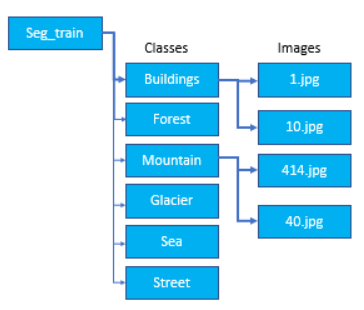
    
    - **Directory 이름을 class name으로 한다.**
    - class 조회: `DirectoryIterator객체.class_indices.keys()`

- ### flow_from_dataframe()
    - 읽어올 파일의 경로와 label을 DataFrame으로 생성한 뒤 그것을 이용해 파일을 Loading한다.
    - dataframe
        - DataFrame: image 데이터의 절대경로와 label을 저장한 DataFrame객체
        - x_col: image경로 컬럼명
        - y_col: label 컬럼명
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
- ### flow()
    - ndarray 타입의 이미지를 받아서 처리. 
    - 주요 매개변수
        - x: input data. 4차원 배열(크기, height, width, channel)
        - y: labels. 
        - batch_size: 미니 배치 크기(기본값:32)
- ### 모델(네트워크)에서 fit() 호출하기 전까지는 preprocessing과 Data Loading이 실행되지 않는다.

## 흐름
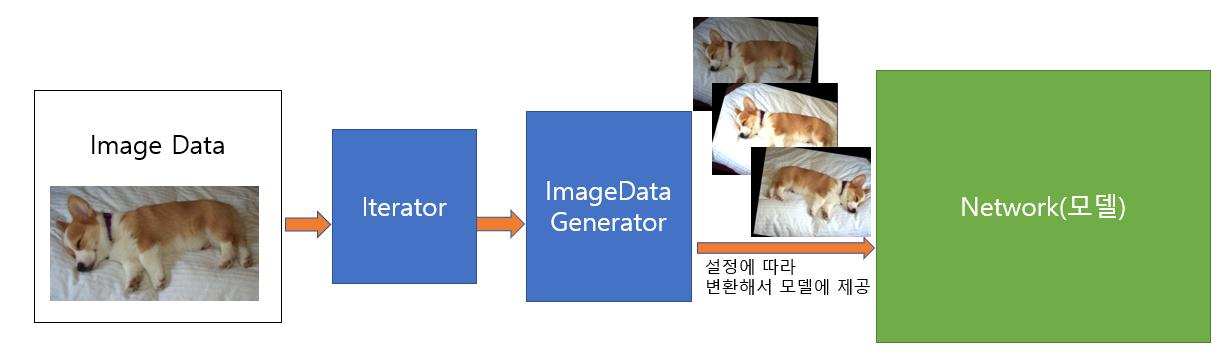

In [27]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing.image import load_img # 경로를 주면 이미지를 loading.
from tensorflow.keras.preprocessing.image import img_to_array # Pillow의 Image 객체를 ndarray로 변환.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 파이프라인 구성.

<class 'PIL.JpegImagePlugin.JpegImageFile'>


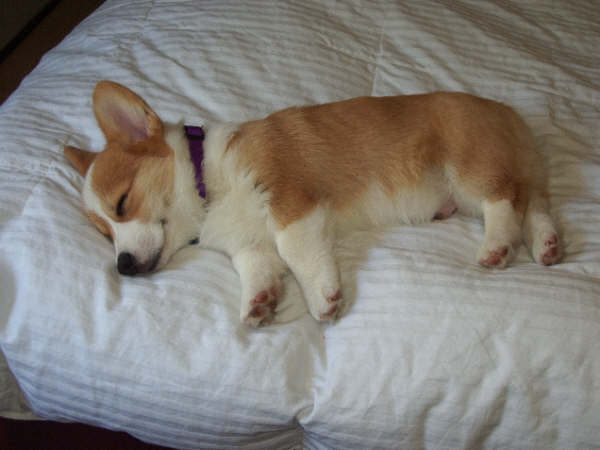

In [28]:
# Image 로딩.
img = load_img('test_img/image.jpg') #target_size = (w,h) 리사이즈 : 파라미터 값이 load_img()에 존재.
print(type(img))
img

In [29]:
# PILLOW 이미지 객체를 ndarray로 변환
data = img_to_array(img)
print(type(data), data.shape)

<class 'numpy.ndarray'> (450, 600, 3)


In [30]:
# batch 축 추가
sample = data[np.newaxis, ...]
sample.shape

# sample : 데이터 셋. 원본 데이터 셋. ====> ndarray로 메모리에 이미 loading 되어 있는 상태.
#                                        ==> flow() 메서드를 통해 파이프라인에 연결 예정

(1, 450, 600, 3)

In [31]:
# Generator 생성
datagen = ImageDataGenerator() # 어떤 처리도 없는 파이프라인 == 빈 파이프라인.
print(type(datagen))
print(next(iterator).shape) # 값들을 한번 제공 (batch size에 지정한 개수만큼 한번에 제공)

## Generator : 
# 연속된 값을 제공(생성)하는 객체. 
# 연속된 값을 한번에 메모리에 저장하지 않고 필요시마다 순서대로 하나씩 제공한다.
# 함수형식으로 구현하며 return 대신 yield를 사용한다.

<class 'keras.src.preprocessing.image.ImageDataGenerator'>
(1, 450, 600, 3)


<class 'keras.src.preprocessing.image.NumpyArrayIterator'>


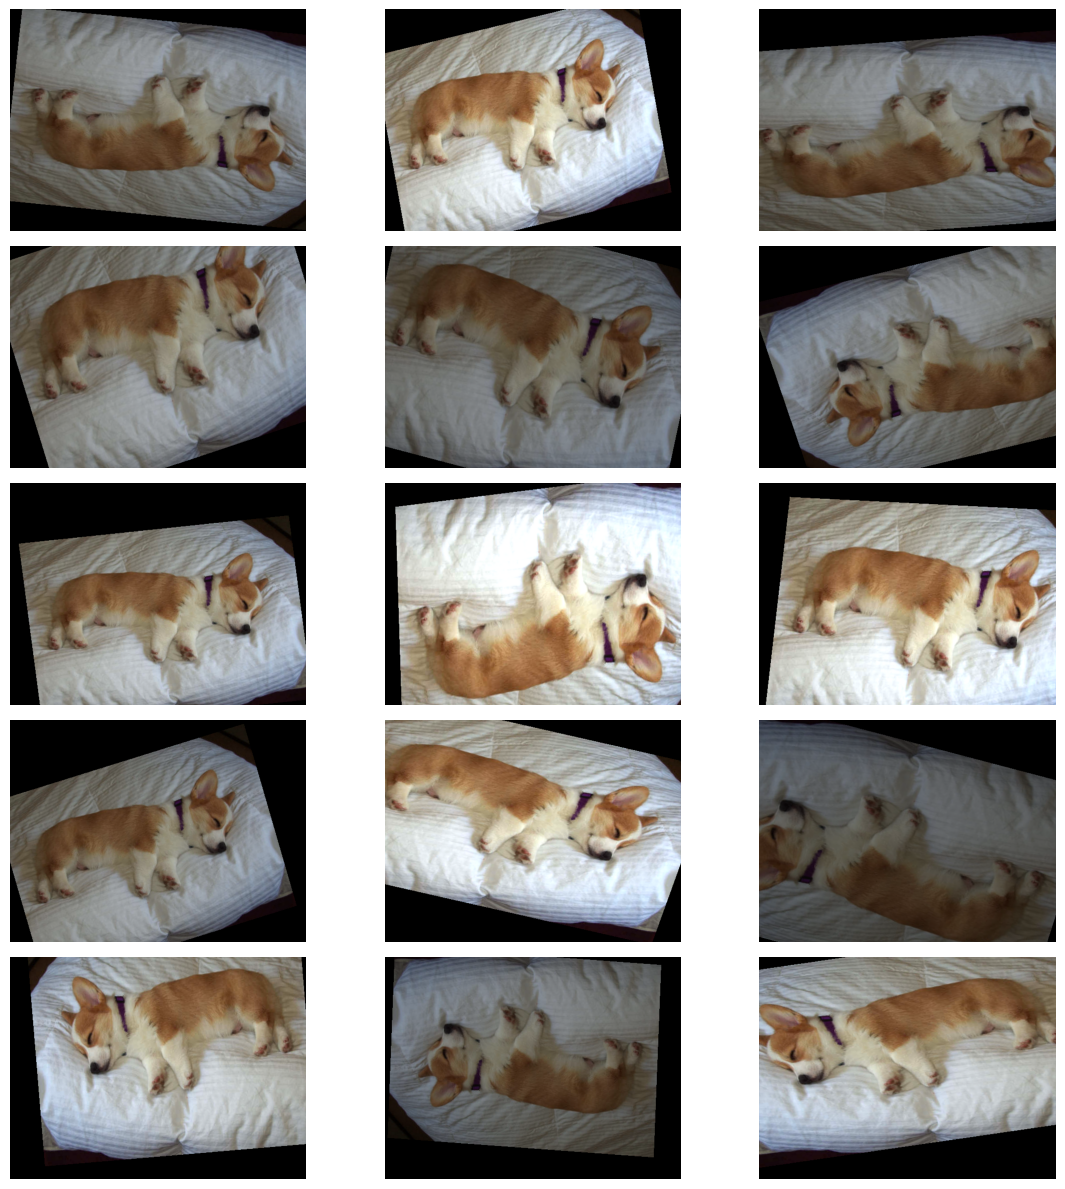

In [68]:
 # 각 pixcel에 rescale의 값(1./255)을 곱한다.
# datagen = ImageDataGenerator(rescale=1./255) 

#상하이동. 0~1사이 실수: width기준 비율.(위:50% ~ 아래:50%) ==> 현재는 width_shift가 상하이동 한다. 
# datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='constant')

# 좌우이동. 정수: -200pixcel ~ 200pixcel 사이. ==> 현재는 height_shift가 좌우이동 한다. 
# datagen = ImageDataGenerator(height_shift_range=200) # fill_mode = "nearest"(default)

# 전단변환 => 평행사변형.
# datagen = ImageDataGenerator(shear_range=50, fill_mode='constant') # 꺾어지는 비율 shear_range
                                                    # shear_range -> 값이 작으면 거의 변화없는거 처럼 보인다.

# 회전 (각도 : -40 ~ 40)
# datagen = ImageDataGenerator(rotation_range=40, fill_mode='reflect')
# datagen = ImageDataGenerator(rotation_range=40, fill_mode='constant') # 빈 공간을 확실하게 볼 수 있음

# zooming (1: 원본), 1보다 크면 zoom in, 1보다 작으면 zoom out
# datagen = ImageDataGenerator(zoom_range=2, fill_mode='constant') # zoom_range :[min, max] 범위를 지정할수있다.
                                                            # 실수값 하나면 -> [1-실수,1+실수]
                                                            # 즉 2면 -> [-1, 3]
# datagen = ImageDataGenerator(zoom_range=[1,5], fill_mode='constant')

# 밝기 (1: 원본) 0.3 ~ 1.3 랜덤하게 선택.
# datagen = ImageDataGenerator(brightness_range=(0.3,1.3))
# datagen = ImageDataGenerator(brightness_range=(0.1,5))

## 반전 : 픽셀들의 위치를 서로 바꾸는 것. 
# 좌우 반전 
# datagen = ImageDataGenerator(horizontal_flip=True) # = True -> 랜덤하게 할 수도 있고, 안할 수도 있다.

# 상하 반전
# datagen = ImageDataGenerator(vertical_flip=True) # = True -> 랜덤하게 할 수도 있고, 안할 수도 있다.

datagen = ImageDataGenerator(
#                 rescale=1./255, # 검은색으로 보이기 때문에 다른것들을 확인할 수 없어 잠시 주석처리함.
                rotation_range=20, # -20~ 20도 회전
                width_shift_range=0.1, # 상하로 height의 -10~10% 기준으로 이동
                height_shift_range=0.1, # 좌우로 width의 -10~10% 기준으로 이동
                zoom_range=0.2, # [줌아웃, 줌인] -> [0.8, 1.2]
                brightness_range=(0.5,1.5), # 0.5 ~ 1.5
                horizontal_flip=True, # 좌우 반전
                vertical_flip=True, # 상하 반전
                shear_range=5, # 전단 변환 (평행사변형 형태로 이동)
                fill_mode = 'constant' # 이동관련 변환 후 빈 공간은 0으로 채운다.
)


fig = plt.figure(figsize=(12,12))
iterator = datagen.flow(sample, batch_size=1)

print(type(iterator))
# print(next(iterator).shape) # 값들을 한번 제공 (batch size에 지정한 개수만큼 한번에 제공)

for i in range(15):
    plt.subplot(5,3,i+1)
    batch = next(iterator) # float32
#     print(batch.min(), batch.max())
    img = batch[0].astype('uint8') 
    plt.axis("off")
    plt.imshow(img)
    
plt.tight_layout()
plt.show()    